# In this notebook 

### We will employ textblob and vaddersentiment to annotate our textual data


In [1]:
import pandas as pd
import spacy,re,os,numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
from  string  import  punctuation     
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

root = '../data/clean_data/'
df = pd.read_csv(os.path.join(root,'clean_data.csv'))
print("Dataset size : " ,df.shape)
df.head(1)

Dataset size :  (8770, 9)


,UserName,Handle,Timestamp,Content,Likes,Retweets,Emojis,Comments,Tag
0,Michael Lewis & Friends,@Michael65413248,"""2020-07-31 11:45""",Bloggers commented on #COVID19SG #COVID19Singa...,79.0,41.0,0,0.0,GE2020SG


In [2]:
#check Tag distributions
df.Tag.value_counts().keys()

Index(['general_election_sg', 'singaporevotes', 'SingaporeVotes',
       'general_election_sg2020', 'sgelections', 'GE2020', 'SGElection',
       'Ge2020', 'GE2020SG', 'Singapore General Election', 'wpsg', 'GESG2020',
       'singapore_general_election_2020', 'Singapore GE 2020', 'SGGE2020',
       'PAPSingapore'],
      dtype='object')

### Data Preprocessing

In [3]:
def preprocess(text, remove_stopwords=True, stem_words=False, punctuations=punctuation):
    # use spacy to do nlp process without parser and NER
    doc = nlp(text, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in newstopwords and tok not in punctuations]
    text = ' '.join(tokens)
    # Clean the text
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub(r'''(?i)\b((?:http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    text=" ".join(text.split())
    return(text)

def sentiment_vader_scores(sentence):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    return score

def sentiment_textblob_scores(text):
    blob = TextBlob(text)
    if len(blob.sentences)==0:
        return 0
    else:
        for sentence in blob.sentences:
            return sentence.sentiment.polarity

# Declare removalable stopwords

In [4]:
nlp = spacy.load('en_core_web_sm', vectors='en_google')
custom_stopwords = [word for word in  open(os.path.join('util','custom_stopwords.txt'), "r").read().split() if word not in list(STOP_WORDS)]
newstopwords = list(STOP_WORDS) + custom_stopwords
print('Stopwords count - default : {}, custom : {}, total :{}'.format(len(STOP_WORDS),len(custom_stopwords),len(newstopwords)))

Stopwords count - default : 326, custom : 301, total :627


In [5]:
keys = [i.lower() for i in df.Tag.value_counts().keys().tolist()]
newstopwords = newstopwords + keys
cleantext = df['Content'].apply(preprocess)

In [6]:
idx = 0
sentiment_textblob_scores(cleantext[idx])

-1.850371707708594e-17

In [7]:
sentiment_vader_scores(cleantext[idx])

blogger covid19sg covid19singapore missing 10 singaporeans actively search pray safety quickly rt {'neg': 0.125, 'neu': 0.455, 'pos': 0.42, 'compound': 0.6369}


{'neg': 0.125, 'neu': 0.455, 'pos': 0.42, 'compound': 0.6369}

In [8]:
vader_result_raw = cleantext.apply(sentiment_vader_scores)
vader_result  = vader_result_raw.apply(lambda score_dict: score_dict['compound'])

blogger covid19sg covid19singapore missing 10 singaporeans actively search pray safety quickly rt {'neg': 0.125, 'neu': 0.455, 'pos': 0.42, 'compound': 0.6369}
feel narrative deny msm fail entire duration husting spend single second msm laser focusse campaigning ignore msm {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.8126}
legend opposition movement ge2025------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
regardless race language religion topic race language unforeseen spotlight sutd senior lecturer dr nazry bahrawi expert weigh commonly skirt subject sutdhumanitie {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
senior tharman shanmugaratnam imo scene opposition n balance capable jamus lim scene {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818}
repost wokfunk make repost jamus korkor respond collab request track evanturetime noodle wokfunk mix xenozenomusic jamuslim {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
covid19 coronaviru risk-----

kinda glad chip dominance strength incrementally old fogey ready {'neg': 0.0, 'neu': 0.335, 'pos': 0.665, 'compound': 0.8378}
nice graphic 2020ge--------------------- {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
percentage versus 2015 swing opposition- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
retains power weakest------------------- {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
pleased majority singaporeans decent disappoint wait young turn {'neg': 0.233, 'neu': 0.517, 'pos': 0.25, 'compound': 0.0516}
10 opposition insignificant watershed moment {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
form govt 61 24 loses key upset expect reduce mandate loss estimate largely correct 10 alter {'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'compound': -0.7351}
cockle warm jamuslim jamuslim1stwin jamuslimfirstwin {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}
opposition 50 different bell curve lah-- {'neg': 0.0, 'neu': 1.0, 'pos': 0

expect actual flip table fine margin drop overall mandate clean wipe opps sweep {'neg': 0.127, 'neu': 0.602, 'pos': 0.271, 'compound': 0.34}
percentage lead 4 g leader 50 percent range base include hsk {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
heng swee keat try suay swee keat alrdy dei {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pov------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
girl sympathy goh meng seng------------- {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
yall usually differ lot----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
mom hear tin pei ling contact help lot macpherson darling uncle auntie {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}
fucken cry dr csj dude literally hell bloody close {'neg': 0.639, 'neu': 0.361, 'pos': 0.0, 'compound': -0.891}
nicole seah 4 margin error old young tend opposition wanna nicole lose {'neg': 0.351, 'neu': 0.649, 'pos': 0.0

3--------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization asia infographic----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization history-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization history-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pennolson buzz visualization------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization history-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization history-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization smm pennolson-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt pennolson buzz visualization histor-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
buzz visualization history socialmedia-- {'neg': 0

opposition alter tactic target---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt theeconomist opposition alter tactic target {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt theeconomist opposition alter tactic target {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt theeconomist opposition alter tactic target {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3 wisely-------------------------------- {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
repent sinner thou shalt opposition economist {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
repent sinner thou shalt opposition economist theeconomist {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
theeconomist opposition alter tactic target {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
opposition alter tactic target b4------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
finally ! rt theeconomist opposition target {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

review govern george yeo pe------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt theeconomist opposition alter tactic target http {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nsp pioneer nsp pioneer----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2020 - choa chu kang 2020 - cho--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
entrepreneur create acemash pennolson--- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
entrepreneur create acemash asia creative fashmash {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.6124}
entrepreneur create acemash c o pennolson {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}
fierce---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
margculbster av referendum uk thur sat-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
luck opposition------------------------- {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}
en

different------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
different------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bookmarke iii--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dtn coffee shop expect sale boost corner coffee shop {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
funny rt stcom famous spg barbarella---- {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
forward outcome tomorrow---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
elect 7th old regime retain powe-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
elect 7th old regime retain powe-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
- - 2020 learning history youtube------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
koh space watershed h---

bbc hotly genera------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hotly memory---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
hotly genera---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bbc hotly contested--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
bbcnew---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
thr bbc tcot---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hotly----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0

ooopps ! its today ! goodluck wisely---- {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.5242}
wisely secret--------------------------- {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
speakthetruth--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
happy wisely :-------------------------- {'neg': 0.0, 'neu': 0.133, 'pos': 0.867, 'compound': 0.7579}
open station open hotly gene------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
open station open hotly gene------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
asiaclassifiedtoday bbc bbc newssingapore asia google {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2 2 mil--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
spotlight coverage sarahbmyers---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
rt bbcworld-----

informer asiaone------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lose majority percentage rt reutersflash rule majority {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
rt blakehounshell shocking rt reutersflash rule majority {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
fuck rt blakehounshell shocking rt reutersflash rule majority {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.7351}
shocking rt reutersflash rule majority-- {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}
surprise reutersflash rule majority----- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
rule open t----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt xxxriainxxx rt reutersflash rule majority {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
blossom11111 lol sorry tweet happen----- {'neg': 0.183, 'neu': 0.423, 'pos': 0.394, 'compound': 0.3612}
zaynmalik nation singapore-------------- {'neg

rule majority--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule majority singaporestar com--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
closely island-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
politician tin pei ling petition trouble end ex {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}
politician tin pei ling petition trouble end ex {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}
politician tin pei ling petition trouble end ex {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}
rt pennolson politician tin pei ling petition trouble end al {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.4019}
politician tin pei ling petition trouble end {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
beat beat------------------------------- {'neg': 0.0, 'neu': 1

open contested-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly bbc---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly elec--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly elec--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bbc counting hotly genera--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly memory------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly elec--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly memory bbc--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly genera bbc--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly g------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly elec--------------------- {'neg': 0

rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cnn com rule rule power elec------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power el asia----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule rule power------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
counting hotly memory------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
opposition breakthrough malaysiakini---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
late 7 opposition s--------------------- {'neg': 0

page admin speak george yeo tin pei ling d {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
page admin speak george yeo tin pei ling didn t {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
page admin speak george yeo tin pei ling didn t {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
recently conclude historic o------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deputy tharman shanmugaratnam 14th serve {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
congratulate tun dr mahathir bin mohamad pakatan harapan outcome yesterday {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4939}
rt bbcworld----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
happen bad dream policy----------------- {'neg': 0.467, 'neu': 0.267, 'pos': 0.267, 'compound': -0.3612}
deputy tharman shanmugaratnam 14th ge14- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

reflection k kesavapany iseas east asia forum {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
interesting 5 ways impact pennolson socialmedia {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
interesting 5 ways impact pennolson socialmedia {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
5 ways impact asia tech blog------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 ways impact--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 ways impact dust settle observer------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pennolson 5 ways impact----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt pennolson 5 ways impact dust settle-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 ways impact dust settle observer------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 ways impact--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 ways impact c o

dtn follow ministry development mnd s--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
follow ministry development mnd--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
follow ministry development mnd--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dtn challenge spore gov t grip watershed t {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}
challenge spore gov t grip watershed influential {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.4939}
challenge spore gov t grip watershed influential {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.4939}
watershed influential role continue reverberate {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
technology 28 05 2020 06 : 54 watershed inf uk socialmedia {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
watershed influential role play uk socialmedia {'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compound': 0.6486}
14th barisan nasional coalition lose power 60 close neighbour tun

unveil batch potential------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
democratic alliance pasir ris punggol upcoming {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
allow open campaigning media tightly control govt mind communist govt control everybody {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}
commission issues listicle campaigner ahead elections elec {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
campaign free foreign interference elections bernama {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
1 big margin outside mistake foreign dorm acknowledge remedy manage covid {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.34}
unveil batch potential follow singaporemalayalees tag singaporemalayalee {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singapore s upcoming ban campaign grant unprecedented access broadcast guideline amid expectation {'neg': 0.224, 'neu': 0.621, 'pos': 0.155, 'compound': -0.2732}
unvei

10 friday dept singaporeans enjoy weekend designate public holiday {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}
pm address singaporeans asia italy------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
probably interesting covid - 19 pandemic era sgelections2020 maybe demonstrate properly {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
30 10 press release elections delete tweet avoid confusion miscalculate {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5267}
30 10 covid19 covid19singapore---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
head advise dissolve 106588318---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dissolve fall 30th confirm later current term run april {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 30----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sahih pm hsien 10----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
head

10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
upcoming interesting let s opposition gain lose {'neg': 0.211, 'neu': 0.312, 'pos': 0.477, 'compound': 0.5267}
happen---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
unveil slate 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
unveil slate 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tipsfrombilllawrence announces dissolve aa stocks verb announce follow person s receive announcement correct headline announces dissolution {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
battle familee-------------------------- {'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
yesterday dissolve pm hsien singaporeans 10 representative ime sre m ebrard julianventurav {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
prospect surprise----------------------- {'neg': 0.0, 'neu': 0.0, '

rule unveil manifesto 10 singaporeprimeminister {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
set 18th 10 try secure 15th consecutive term 1959 job covid19 {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}
delay reopen border hisham-------------- {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}
rule unveil manifesto 10---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
delay reopen border hisham-------------- {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
qcyn2 chuang soribada snh48 7th elections {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule unveil manifesto 10---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ahead deal account misrepresentation---- {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4588}
extraordinary development 42 - year old ivan lim recently introduce rule people s upcoming 

5 upcoming 106591201-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 singapore s upcoming------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
close yesterday 93 rule constituency main opposition aim 21 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 singapore s--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
commentary battle begin head campaigning {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.3818}
5 singapore s upcoming------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
announce 30----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming-------------

hello middle inform--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
peoplesactionparty---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
hengsweekeat---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bye america colorado florida london paris home 10 arnold schwarzenegger version backkk douglas macarthur version shall {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
upcoming-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
thoughts-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
perambulate vehicle outlaw-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
noo i ve referendum regional eu sense it 21 culture {'neg': 0.0, 'n

premiere tampines----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2015 bit property landscape owner private property encourage home price continue trend upward despite additional cool meas {'neg': 0.097, 'neu': 0.74, 'pos': 0.163, 'compound': 0.3265}
session assalamualaikum wbt dear iium community cope home {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.3818}
policy area studies unit science organise intreste session detail date 9th 4pm zoom {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
gursikh politician harminder pal singh-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
responsibility informed nice spreadsheet compare manifesto friday {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
upcoming favor lgbt repeal 377a sodomy law lgbtright {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
followme picture campaign trail amid covid - 19 outbreak campaigning singapore s wrap wednesday jul 8 improvise outreach effort

dow jones eyes faces-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
mask hand sanitizer n gloves station citizen arrive amid global covid19 pandemic 2 65 million ppl expect {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4939}
trtworld yasmineelsabawi supremecourt ruling prosecutor tax melralph incumbent pm term hour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
begin amid covid19 pandemic total 191 11 1 independent compete 93 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cast ballot mask glove amid pandemic cast ballot mask glove amid pandemic 8 a m {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singapore s public holiday extra safety measure {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.6705}
dow jones eyes faces-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cool------------------------------------ {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182}
summary constituency-----------------

hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
mi dormo malfrue ar mi volos scii la rezulton de hd special 76 457 now starte stream 26 minute ago 70 90 mil spektantojn el diversaj landoj se esperanto esta bonega angla malbona vi havas nenion {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.4019}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
wonder govt type chat screen cos hokkien vulgarity word appear {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
real update analysis fare stvisual stcom {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singaporeans head cast city friday safety measure continue battle coronavirus outbreak {'neg': 0.181, 'neu': 0.625, 'pos': 0.194, '

---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
rule 61 2 main opposition pick 10------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
late yesterday-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
96 turnout despite coronavirus pandemic- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
people s friday------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
article 96 turnout despite coronavirus pandemic businessnews 10 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singapore s strong mandate overall fall 61 24 69 9 2015 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
83 available 93 61 24 10 claim include-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
02 : 57 : 35 source financial title singapore s rule financial headline {'neg': 0.0, 'neu': 1

rule------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule pandemic lose---------------------- {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
pti new people s friday----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
common saying popularise recently------- {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3818}
common saying popularise recently------- {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'compound': 0.3818}
rule fall near low---------------------- {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}
s rule retain power friday reduce majority {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule fall near low---------------------- {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.2732}
rule------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
83 92 hsie

rule retain power reduce majority power 1965 83 93 parliamentary 61 2 nearly 70 2015 6 17 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule retain power reduce majority power 1965 83 93 parliamentary 61 2 nearly 70 2015 6 17 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
rule------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
coverage topic southeast asia money laundering cave rescue {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
followme opposition swin

globalbuzz total number cast conclude 2 540 359 95 81 2 651 435 register elector singapore s elections eld {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.1513}
interesting thread singapore s sentiment analysis {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
success amidst pandemic----------------- {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
stopelectoralfraude announce afta 24 hour iebc wchebukati kenya copy term system end electoral frauding hakingo electoral fraudin enemy kenya {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5423}
democratic thursday jul 16 independent inquiry conduct woman miss error officer {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.5106}
cost------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
16 leehsienloong receive phone australian scottmorrisonmp congratulate pm {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
xi jinping speak hsien congratulate 10 main

bbc analysis---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10th proving tgat effective measure allow scotland {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}
secure 83 93 asean covid19 2020generalelection {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
possible opposition extraordinary ahead hear verdict everybody {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.1531}
probably alex kaleigh explore democracy- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
probably alex kaleigh explore democracy- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
impact foreign investor pandemic trade covid19 economicrecovery gdpgrowth {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
episode reunited reunion---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
positive stride number woman fact 29 21 2015 wob404020 wome

rule------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
rule retain power reduce majority power 1965 83 93 parliamentary 61 2 nearly 70 2015 6 17 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule retain power reduce majority power 1965 83 93 parliamentary 61 2 nearly 70 2015 6 17 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pritamsingh----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
republic kenya opportunity congratulate landslide victory wish visionary leadership {'neg': 0.0, 'neu': 0.292, 'pos': 0.708, 'compound': 0.9022}
rule fall near low asia asianew asian asiannew asia {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732}
jerusalem post promise providing house nations promise remember 83 93 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}
terrific thread----------------------

percentage papsingapore versus 2015 photo credit vulcanpost {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}
statedept statement congratulate-------- {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}
rule retain power fall sharply shadow coronavirus outbreak {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
add govsingapore goodgovernance transparency sharedvalue twittersg singaporeembdc {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wear mask glove singaporeans friday expect rule power test hsien {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
remain power rule----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule 61 2 main opposition pick 10------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
secpompeo congratulation 13th forward continue partnership root economic diplomatic security cooperation {'neg': 0.0, 'neu':

happen family household----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
important date history mark wait release electoral division majulah sgunite {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.2023}
hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
feel horrible emotionally lol turn attention train {'neg': 0.31, 'neu': 0.442, 'pos': 0.248, 'compound': -0.1779}
hd special youtube---------------------- {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
hd special------------------------------ {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
dow jones eyes faces dow jones s p 500 decline nasdaq composite rise ahead shanghai composite fall index eye dailyfx {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dow jones eyes faces dow jones s p 500 decline nasdaq composite rise ahead shanghai composite fall index eye dailyfx {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
thoughts

10 red safety measure delay voice stay safe friendly reminder friend {'neg': 0.113, 'neu': 0.294, 'pos': 0.593, 'compound': 0.8689}
dow jones eyes faces-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2020 7 10 singapore kicks youtube------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
dow jones eyes faces-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dow jones eyes faces-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1eyeonasia------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
moed eat simple light eat fish pray god appoint 93 bring great great prosperity {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.9118}
painting friend wisely rest recover current pandemic prosper {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7184}
challenging manage amid novel coronavir

past cumulative safe large swing 16----- {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
single mother mao god omaogod cdc commidescochon sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}
super insightful infographic newnaratif- {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}
key eia crude oil inventory wednesday eye u s weekly jobless claim thursday friday rate australia {'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.5719}
key eia crude oil inventory wednesday eye u s weekly jobless claim thursday friday main market {'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.5719}
moment 2015 youtube--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ok bear guy friday imperative talk politic point dire constructive leader gen zs turn real {'neg': 0.165, 'neu': 0.714, 'pos': 0.121

5 upcoming cnbc------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cnbc 5 upcoming------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming cnbc------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
campaign swing deputy spotlight constituency season {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
announce 30----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 upcoming upcome----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
commentary battle begin head campaignin

removes fabrication admin account socialmedia {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
coronavirus disrupt campaigning--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
upcoming-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rise credible opposition maturing system fragile term bullish {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
vs malay mail--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
withdraw arrogant smile lift jeez mps england {'neg': 0.299, 'neu': 0.467, 'pos': 0.234, 'compound': -0.1779}
vs malay mail--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tip stay cyber safe--------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pu

timeline key development lead----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
expressexplained precaution coronavirus pandemic question answer {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hsien estranged young brother hsien yang formally ambitious form establishment rebel major twist ahead 10 {'neg': 0.09, 'neu': 0.734, 'pos': 0.175, 'compound': 0.3612}
unveil slate 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pm announce battle family son square ensue {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3818}
unveil upcoming thursday 25 todayonline- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
walk continue--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
prospect surprise----------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
yesterday dissolve pm hsien singaporeans 10 representative ime sre m ebrard julianventurav {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

head mandate amidst pandemic coronaviruspandemic leehsienloong {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sarawak different learn 2015 2016 2015 swk 2016 track {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 07 20-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sahih pm hsien 10----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
head midst coronavirus pandemic--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dissolve fall 30th confirm later current term run april {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 30----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
head advise dissolve 106588318---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
30 10 covid19 covid19singapore---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
30 10 press release elections delete tweet avoid confusion miscalculate {'neg': 0.355, 'neu': 0

unveil batch potential------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
upcoming ban campaign grant unprecedented access broadcast guideline amid expectation {'neg': 0.255, 'neu': 0.567, 'pos': 0.177, 'compound': -0.2732}
unveil batch potential follow singaporemalayalees tag singaporemalayalee {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1 big margin outside mistake foreign dorm acknowledge remedy manage covid {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.34}
campaign free foreign interference elections bernama {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
commission issues listicle campaigner ahead elections elec {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
allow open campaigning media tightly control govt mind communist govt control everybody {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}
democratic alliance pasir ris punggol upcoming {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
unveil batch pote

emerge coronavirus shutdown turn attention timing politician pundit drop hint near {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2732}
10th throwback election2020 votingday juyingprimaryschool withfamily {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pleased woman politic enter woman cabinet tommykoh {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
elections dust settle 18th revelation irregularity double standard help euphoric optimism singaporeans futur {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.886}
28 pm leehsienloong receive phone indonesian jokowi congratulate pm {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}
hsien announce cabinet 15 rule bag 61 24 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hsien announce cabinet jul 25 15 61 24-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
funny bit commentary reflect------------ {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
bbc analysis--------------------

xie yao quan jurong hot----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
5 proof stock--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
amid covid - 19------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
removes fabrication admin account socialmedia {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
upcoming-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
vs malay mail--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
30th 10th------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rumour float electoral boundary announce walk

settle lite real pm hsien--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
blank cheque ncmp scheme chun indranee-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tackle concern-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
propose economic matter----------------- {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.0258}
vivian balakrishnan refute chee juan 10 m population claim sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
half hearted nee shanmugam-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
automatic singaporeelections2020 opposition wisely {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
hand include covid - 19 pandemic large fight {'neg': 0.22, 'neu': 0.508, 'pos': 0.271, 'compound': 0.1531}
expect fight lead heng swee keat-------- {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.3818}
pv shy mysterious seriously hard submit headshot slowstart {'neg': 0.505, 'n

die fall sick noblankcheque sgvote------ {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.802}
refuse answer question noblankcheque sgvote {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
elon musk blast domestic bliss---------- {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
pm hsien cabinet stvisual stcom--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ivan lim replace wu meng wu meng retire sgvote noblankcheque {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wu meng oppose sake oppose noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
west resident regret noblankcheque sgvote {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4215}
cabinet post - ge2020 stvisual stcom---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stop attempt fix noblankcheque sgvote--- {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
run stupid campaign noblankcheque sgvote {'neg': 0.459, 'neu': 0.541, 'pos': 0

singaporeans lose foreign talent noblankcheque sgvote {'neg': 0.284, 'neu': 0.421, 'pos': 0.295, 'compound': 0.0258}
a - 50 - year ponde incident noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
virtual mps continue noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lose noblankcheque sgvote--------------- {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
smear tactic noblankcheque sgvote------- {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.3612}
pofma abolish noblankcheque sgvote------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
expect noblankcheque sgvote------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ng chee meng noblankcheque sgvote------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
leader opposition pritam singh humble background noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sex education important noblankcheque sgvote {'neg': 0.0, 'neu': 0.6

singaporeans prefer sgvote noblankcheque {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
gst sgvote noblankcheque---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule law sgvote noblankcheque----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
true hallmark real leader--------------- {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
hard truth hsien yang noblankcheque sgvote {'neg': 0.182, 'neu': 0.519, 'pos': 0.299, 'compound': 0.2263}
real sgs2020---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hsien screw noblankcheque sgvote-------- {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.1027}
pm track sgvote noblankcheque----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
continue penalise singaporeans sgvote noblankcheque {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
young supporter father buangkok square mall yesterday charlesyeorefo1 anetyunus {'neg': 0.0, 'neu': 0.792, '

y west sgvote--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dammit bukit batok sgvote--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
leave friend---------------------------- {'neg': 0.273, 'neu': 0.0, 'pos': 0.727, 'compound': 0.4588}
cry dr cheng bok cat enter house-------- {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}
coasts aint----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nicole seah votepapout noblankcheque---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
disappointed obvious bring yam ah mee--- {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
interesting pm manpower speak municipal concern speech mention trend reference covid - 19 rhetoric {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
music streaming jo teo speak------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
electoral credit rule send dpm heng strategic ultimately 

scream blow hammertime------------------ {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
noblankcheque votepapout---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stan raeesah alhamdulillah-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
big lose massive statement rule interesting {'neg': 0.287, 'neu': 0.426, 'pos': 0.287, 'compound': 0.0}
alright 60 wpsg 53 let number----------- {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.3182}
pritan singh man------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
jamus oppa lead------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nicole seah nicole siam alas henge------ {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.2732}
exciting ge2015------------------------- {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}
lol guess ready heng swee kiat pm------- {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}
stan

west noblankcheque---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cat run midnight mnp sgvote------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ed pmo officer refer agc conflict interest votepapout {'neg': 0.204, 'neu': 0.531, 'pos': 0.265, 'compound': 0.1779}
apologise advance american friend mute hour passionate {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.8481}
remove elections noblankcheque sgvote--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
asshole complain officer 8 p m eh hello try officer lah motherfucker complain complain elections complain officer bodoh {'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.9274}
extension hour highly irregular cheng bock sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
channelnewsasia mask cool--------------- {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}
cat invaded dr cheng bock house tv progresssgparty catsoftwitter {'neg': 0.0, 'neu': 1.0, 'pos

mismanagement covid - 19 continue noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sgvote noblankcheque-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dpm heng sgvote noblankcheque----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
despicable tactic sgvote noblankcheque-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
warm hear lo pritam singh donate allowance deny lhl discretely politic donate discretely expect transparency pritam ndp2020 {'neg': 0.124, 'neu': 0.777, 'pos': 0.098, 'compound': -0.128}
achievement sgvote---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
co driver slap driver hard sgvote------- {'neg': 0.2, 'neu': 0.571, 'pos': 0.229, 'compound': 0.0516}
pm sgvote------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
expensive cabinet sgvote---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dud pm strong cabinet sgvote----

minimum wage minimum wage rest noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fixing begin noblankcheque-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singaporeans blank cheque man noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
spend fix opposition noblankcheque------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
high disproportionalitie noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
grassroot advisor noblankcheque sgvote-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
p ge2020 continue fix noblankcheque----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
opposition grassroots advisor noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
consistently high disproportionalitie noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
minimum wage minimum wage rest noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

seriously continue try ceca rubbish----- {'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.1779}
solution problem singaporeans noblankcheque sgvote {'neg': 0.338, 'neu': 0.375, 'pos': 0.287, 'compound': -0.1027}
fix expose noblankcheque sgvote--------- {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.1531}
abuse power pm noblankcheque sgvote----- {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.6369}
pm let singaporeans noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pro foreigner anti singaporeans noblankcheque sgvote {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}
random cough cough papsingapore wecare neighbour sim ann sun xueling mandarin pretty basically jinx lahh sgvote {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4939}
pm noblankcheque sgvote----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
crocodile tear pm noblankcheque sgvote-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dir

refuse play fair noblankcheque sgvote--- {'neg': 0.247, 'neu': 0.225, 'pos': 0.528, 'compound': 0.3612}
opposition dissolve noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
unaffordable public housing noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
elections clean noblankcheque sgvote---- {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
shameful behaviour ho ching noblankcheque sgvote {'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.4939}
politicalbrande market------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
elections pm noblankcheque sgvote------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
kim huat score winner loser critical exam {'neg': 0.422, 'neu': 0.296, 'pos': 0.281, 'compound': -0.2263}
happen singaporeans blank cheque noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
close 23 opposition noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

singaporeans confidence rule noblankcheque sgvote {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
mao god omaogod cdc commidescochon sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}
young singaporeans opposition noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
donch sabo handover mao god omaogod cdc commidescochon sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}
ivan lim ge ge2020 - ivan lim makes surprise appearance paps jurong noblankcheque sgvote {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
constituency repent noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cheng bock west grc groups 394407690736903 view permalink id = 1669085053269154 noblankcheque sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
organic rose symbolize colour istandwithraeesah jamuslim {'neg': 0.0, 'neu

fan badge fb cooling woohoo wpsg makeyourvotecount truebluesg {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.6808}
duze frans ceo tiktokdown covid19 entanglement fake encounter hitrefresh thewarehouse carryminati ambitiouz ent tweezyza sonymusic {'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4767}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
mps wpsg truebluesg makeyourvotecount--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ayasofyacamii buygoya bayyanlis carryminati dubai fake encounter hagiasophia insiders jin luvityselcaday lajauria lilidance4 onceselcaday learn money fast workfromhome makeup makemoney affinitweet {'neg': 0.134, 'neu': 0.866, 'pos': 0.0, 'compound': -0.4767}
ayasofyacamii buygoya bayyanlis carryminati dubai fake encounter hagiasophia insiders jin luvityselcaday lajauria lilidance4 onceselcaday learn money fast workfromhome makeup makemoney affinitweet {'neg': 0.134, 'neu': 0.866, 'pos': 0.

yishun rid toxic person sgvote---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
holly ivan lim aka bask spotlight------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
noblankcheque votepapout---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sgvote---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
59 93 60-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
astonish style deride culture headway western pursue progressive fair ethos universal ideal culture {'neg': 0.118, 'neu': 0.562, 'pos': 0.32, 'compound': 0.5574}
w inning p arty sgvote------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pritam singhhhh------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sgvote boy bad boy---------------------- {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
ivan lim tharman------------------------ {'neg': 0.0, 'neu': 1.0, 'pos

turn cna witch talk sgvote-------------- {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}
sgvote ge2015--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seriously guy speechless---------------- {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.1779}
60 83 39 17 pollingday2020 sgvotes2020 2020 zaobaosg pollingday {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
prefer nicole seah votepapout noblankcheque {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1393 reject----------------------------- {'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}
resident delete map--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cost 53228 61009------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
haizzz sgvote--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rip eastcoastplan----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tr

paul t 2025----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
absolute bullshit bukit panjang infectious disease expert bodoh {'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'compound': -0.5859}
paul tambyah---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
hey wpsg supporter excited guy covid - 19 cluster couple {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.5423}
yam ah mee------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tcb pave cpf education scheme utilise stupid cpf system {'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.5267}
haizzz sgvote--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
paul tambyah lose----------------------- {'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
---------------------------------------- {'neg': 0.0, 'neu': 0

biased refuse invite pvp nation debate establishment pvp threat peoplesvoiceparty {'neg': 0.503, 'neu': 0.392, 'pos': 0.105, 'compound': -0.7269}
joke chicken wing chicken singaporege2020 literalquote {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.296}
afraid scrutinise politician press hard question wrong impression forces leng declare directorship singaporege2020 {'neg': 0.274, 'neu': 0.61, 'pos': 0.116, 'compound': -0.3818}
remember power hand vto singaporege2020 10july {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4939}
actually singaporege2020 vto voteforchange {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
collaboration tocsg--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
super excited sgvote-------------------- {'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.743}
unity strength bradbowyer singaporedemocraticparty bryanlim {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
dr cheng bock confidently journalist home

race view conversation age old societal divide {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
random cough cough papsingapore wecare neighbour sim ann sun xueling mandarin pretty basically jinx lahh sgvote {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4939}
view ceca free trade agreement---------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7579}
norm normal----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
asian vc firm antler funds us 1 5 million 15 startup link complete hsradar asia investors antler antlerglobal {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
run mill type mps toe beginning slumber erosion standing {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
publish song voice singing justduet karaoke {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
affiliation powerful affect friend choose bias attitude arise sgpolitic {'neg': 0.104, 'neu': 0.448, 'pos': 0.448, 'compound': 0.6808}
reminder 61----------

shift sand electorate opposition inroad subsequent {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
aike paper thenewpaper tone deaf headline wondering copy editor currently ok apparently sgvote {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}
piece minority myth write malay perspective apply minority heed advice hello minority kixe {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
calculate swing 6 5 tough paper possible strong jamus oppa effect happen {'neg': 0.101, 'neu': 0.676, 'pos': 0.223, 'compound': 0.4215}
pritamsingh peoplesactionparty primeminister covid 19 coronaviru lockdown indian politician humsamvet {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
speak----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
61 24 citizen hear

peep house jamuslim istandwithraeesah--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
70 61 okay lah singaporeans improve----- {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5859}
retains power weakest papsingapore wpsg- {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5106}
surprised stunning victory-------------- {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.5423}
beautiful map congratulation majority let walk tough ahead {'neg': 0.105, 'neu': 0.35, 'pos': 0.545, 'compound': 0.8074}
hashtag--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
auspoi swing order rout status quo democracy grand lky fiefdom {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
6 000 bother west shame history--------- {'neg': 0.579, 'neu': 0.421, 'pos': 0.0, 'compound': -0.6705}
mandate transparent singaporeans sgvote- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wonderful popular 61 systrm b close 61 system {'neg': 0.0, 'ne

ugh tampines sigh tampine hsk----------- {'neg': 0.406, 'neu': 0.435, 'pos': 0.159, 'compound': -0.4019}
curious reject high ink problem--------- {'neg': 0.557, 'neu': 0.206, 'pos': 0.237, 'compound': -0.4767}
evil hear evil speak evil ding dong witch sgvote {'neg': 0.758, 'neu': 0.242, 'pos': 0.0, 'compound': -0.9493}
course papsingapore stupid create shld homogeneous culture district shoot foot sgvote {'neg': 0.365, 'neu': 0.503, 'pos': 0.132, 'compound': -0.5719}
cheng bok speech create glad bye-------- {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.6249}
dr cheng bocks speech heartwarming hypebeast ah gong {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.4767}
surprise absolutely declare far clinch overall majority {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}
chuan jin solid chap-------------------- {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.1531}
pasir ris punggol 64 15 democratic alliance 23 67 peoples voice 12 18 {'neg': 0.0, 'neu': 1.0, '

punggol west 60 97 39 03---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
punggol west 60 97 39 03---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
radin mas 74 03 rp 25 97---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
radin mas 74 03 25 97------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
streaming hq geylang road offer smile wave question offer deliver later {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
btw whiff wind possibly circuitbreaker round 2 shenanigan tighten belt maybe haircut bubble tea tmr sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
weloveyoudrchee deserve fight hard------ {'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'compound': -0.4588}
pioneer 61 98 35 24 indep 2 78---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
interesting----------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
pioneer 61 98 35 24 cheang peng wa

kerfuffle ahtc elector faith salute----- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
current 12 : 36------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
super majority-------------------------- {'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
happy sorry include xoxo---------------- {'neg': 0.13, 'neu': 0.1, 'pos': 0.77, 'compound': 0.8126}
react----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
steady pom pipi sgvote------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
mo kio 72 28---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lead 60--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
mo kio 72 rp 28------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
foward mall food court---------

wife try fall--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
heard - actually high ambition prefer brain bc embarrassed sgvote {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
afternoon fall anytime------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seal ballot box------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
midst covid 19 essential essential------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
8pm 96 cast extension imagine opposition deny 4 vote ! do not opposition trust proceeding {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.6591}
bkk singaporeans shit election2020------ {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
vasantham central screen sakar channel pollingd

wow lot govt efficiency planning course true blue style excuse unprecedented hour extend 10 p m {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.8779}
elite idea allocate 4 6pm slot young ppl queue kilometre 530pm {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
favorite-------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}
history awkward efficient overheard blame civil servant incumbent er okay evil official fault emperor innocent {'neg': 0.424, 'neu': 0.305, 'pos': 0.271, 'compound': -0.6124}
extra hour extend 10 p m detail--------- {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.1779}
covid safety measure station queue hour extend 10 p m original 8 p m late extend 10 p m {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.7579}
hour extend 10 p m small number station continue queue eld {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.25}
yam ah mee young sorry rule------------- {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'com

---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
2 65 million singaporeans expect cast 1 100 station {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
follow liveblog include break evening--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2 65m + cast remember 14thparliament stake decide end papsingapore wpsg yoursdp progresssgparty pollingday votethemallout2020 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
glove sgvote---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
eld glove available sanitiser glove----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
halima yacob remain power opposition---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
fate decide amidst gerrymander---------- {'neg': 

peek journo survival kit partylikeajournalist {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
majulahsingapura------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
brave lion defeat witch majulahsingapura {'neg': 0.505, 'neu': 0.183, 'pos': 0.312, 'compound': -0.2732}
reflect fear nelson mandela------------- {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}
feel sense anxiety round---------------- {'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.1779}
infographic 3 ago----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
queue form st gabriel secondary 9 30am resident serangoon battleground incumbent {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4019}
safe god bless-------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7783}
happy privilege------------------------- {'neg': 0.0, 'neu': 0.

ha ha concern crash bidding interest vehicle owner {'neg': 0.186, 'neu': 0.276, 'pos': 0.538, 'compound': 0.6249}
antis hater continue hate justify hates ! just block noise sway distract inner peace happiness search meaning lifetime {'neg': 0.45, 'neu': 0.334, 'pos': 0.216, 'compound': -0.7712}
apparently tom cast allot band fall nalla neram accord tamil panchangam early rain shine puyal pandemic {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cool decreed heavens sgpolitic sda spp-- {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.6124}
40 192 female woman outnumber man high education female representation lag latest global gender gap index rank 92nd empowerment {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.34}
bet break cool rule cycle 2 5----------- {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
stake high stcom------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seriously vodien hosting miss interactive man sghoste {'neg

grassroots adviser---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ago tanjongpagar legend lose chapter begin opponent {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
sgvote---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
private home close door fact remark arrogant self idiot chanchunsing papsingapore progresssgparty wpsg yoursdp {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.7579}
opposition play game-------------------- {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.34}
certainly overshadow campaigning-------- {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.34}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
vulnerability necessarily objective fact matter perspective sudhir narrative small vulnerable {'neg': 0.319, 'neu': 0.588, 'pos': 0.092, 'compound': -0.4019}
ch 5 mediacorp broadcast nsp tampines lead reno fong speak topic pmets h

michelle open experience ivf passion education weird opposition {'neg': 0.159, 'neu': 0.561, 'pos': 0.28, 'compound': 0.3182}
orwellian socialist tremendous influx foreigner 40 percent population particular cheaplabor middle level usual docile deeply disenchanted realdonaldtrump vp {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hey facebook randizuckerberg page disguise let fair pls remove page {'neg': 0.159, 'neu': 0.556, 'pos': 0.286, 'compound': 0.1531}
election2020---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
holland bukit timah fight heat campaigning yoursdp release statement accuse papsingapore false vicious accusation {'neg': 0.471, 'neu': 0.529, 'pos': 0.0, 'compound': -0.7845}
yoursdp campaign strategy focus help singaporeans navigate covid propose gst suspendion retrenchment insurance elderly crystallize 4y1n campaign {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
grapple raeesahkhan saga west love tweet wave refreshin

cost------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stopelectoralfraude announce afta 24 hour iebc wchebukati kenya copy term system end electoral frauding hakingo electoral fraudin enemy kenya {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5423}
success amidst pandemic----------------- {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
globalbuzz total number cast conclude 2 540 359 95 81 2 651 435 register elector elections eld {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.1513}
pritam singh emerge hero answer 5 question pose asia samachar {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.5574}
speak normally write meredith weiss----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hsien elections latest updates hsien pca opposition 10 bharatvanshi pritam leader {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound':

singaporeans 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
date 10 stamp 4mins40sec pm hsien election2020 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singaporeans 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singaporeans 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
elections eld jun 23 halimah yacob writ fall jul 10 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singaporeans 10------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
friday 10th public holiday secret compulsory pollingday {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
30 10 covid19 covid19singapore---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
awful looking chill relax enjoy wildlife nature charge mental battery hurry quaichproject obviously godforsaken desperate tourist focus intervention edinburgh {'neg': 0.201, 'neu': 0.568, 'pos': 0.231, '

tigerfists88 peopleschamp obama biden p2 rt t4a {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
istandwithraeesah low thia khiang appearance reassure {'neg': 0.247, 'neu': 0.471, 'pos': 0.282, 'compound': 0.0772}
stand raeesahkhanwpsg------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dennis priority resident---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
settle lite real pm hsien--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
aljuniedgrc----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
business agenda------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pritam singh needle acknowledge hard task create {'neg': 0.165, 'neu': 0.588, 'pos': 0.247, 'compound': 0.1779}
sheer entitlement govern arrogant disgusting mention severely undermine conscious reject {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.926}
chart system resident------------------- {'n

hey great opposition promise policy i - actual experience don t rock boat {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7506}
group maruahsg friday secret attest agent believe scare monger ge2020log log connect friend family m facebook com {'neg': 0.15, 'neu': 0.701, 'pos': 0.15, 'compound': 0.0}
exhausted different typical mudslinging attack logical fallacy deploy close home despite youth power politicking {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.6808}
6 woman catch attention mao god omaogod cdc commidescochons sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
stake high------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
campaign poster wpsg bedok love colouful estate backdrop makeyourvotecount {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
campaigning st newsroom friday tomorrow cooling day editor sentiment translate actual multimedia - this episode edito

makeyourvotecount library unread book--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
deepen appeal young generation---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
twtrrr paulbongiornofor 35 remember tower cost 2 dorm immense cost raise 44 983 treat cheaply community transmission {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
battle mind middle ground--------------- {'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.3818}
opposition leader ignore covid - 19 opposition leader ignore - they point relate reiterate objection pandemic straitstimes com straitstimes com {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.6124}
respond pm reiterate manifesto idea tackle pandemic respond pm reiterate manifesto - the yesterday acknowledge effort deal coronavirus pandemic responsible opposition forward straitstimes com {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}
politic american idol dance public 6 road remember song auto tune poli

vivian balakrishnan serial spender poor track holland bukit timah mao god omaogod cdc commidescochons sgelections2020 sgvote sgvotes2020 sgunite {'neg': 0.146, 'neu': 0.755, 'pos': 0.099, 'compound': -0.25}
freebie room 2 daiso hammer unit-------- {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}
dear recently community covid - 19 rise fast wear mask safe distance attract crowd public health important covid19 covid {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8316}
bertha henson question ask turn door sgpolitic sgquestions ask turn door reddit com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rdu reddotunitedsg red united----------- {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
lky invented silent majority mao god omaogod cdc commidescochons sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
hawker food court thereformparty reform thereformparty 7 5 meet resident morning {'neg': 0.0, 

ron highlight practice appoint lose grassroots adviser ward {'neg': 0.243, 'neu': 0.541, 'pos': 0.216, 'compound': -0.0772}
wonder noise neighborhood ah lorry sgpolitic {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
round corner---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
retain focus term create masagos zulkifli masagos tampines papsingaporesingapore retain focus term create masagos environment - singapore continue term sustainability digital transformation deal near term priority bring coronavirus straitstimes com {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4939}
meet walkabout bedok meet walkabout - voter dilemma catch elect elect kenneth foo lead dpm heng swee straitstimes com {'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.1779}
dr chee apologise singaporeans demand apology doublestandard cheesoonjuan singaporedemocraticparty 10millionpopulation josephineteoapology migrantworker {'neg': 0.105, 'neu': 0.629, 'pos': 0.266

outcome myopic represent effect talk manifesto propose policy {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
difficult journey balanced important pritam singh wpsgge2020 difficult journey balanced important term dream healthy democracy form channelnewsasia com {'neg': 0.198, 'neu': 0.474, 'pos': 0.328, 'compound': 0.3182}
dailyphoto luck poster lamp sgvote------ {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588}
key highlight manifesto marsilingyewtee developmental resident expect 5years mandate marsiling yew tee singaporege2020 plans marsiling yew tee introduce key highlight manifesto marsiling yew tee developmental resident expect 5years w youtube com {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.5859}
mind elderly uncle mao god omaogod cdc commidescochons sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}
169 covid - 19 infection include 11 community 3 import casessingapore 169 covid - 19 infection 

dailyphoto poster spot neighborhood sgvote {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
voice vocal tad credibility confidence-- {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
peoples voice begin introduce onlinesingapore peoples voice begin introduce - singapore peoples voice pv introduce slate page straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
guy debater love open debate policy----- {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
economy mind analyst economy mind analyst - when singaporeans cast 10 economy expect defining straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
champion growth mindset dr jamuslim digitaltransformation wpsg jamuslim {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579}
tackle concern tackle concern - protecting current economic downturn piece puzzle deputy heng swee keat yesterday straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0,

stroke heng cue card eastcoastplan eastcoastgrc hengsweekeat nominationday stumble {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
west iswaran west - west 2011 objective forward strong serve resident straitstimes com {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
visit 888 plaza meet lim merchant association head kindly bring 888 hi merchant resident hany soh marsilingyewtee sgvote mytgrc {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}
total 31 constituency run neighbourhood mostsharedget explore interactive stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
remember freudian slip 7 feb 2017 halimah mention intention 17 jul 2017 link officially announce bid 6 aug 2017 6 sgpresident sgpoliticsis bring discussion r birddropping 163 point 30 reddit com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
peek bishan toa payoh picture scene follow spp sg instagram {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 

consolidation growth opposition--------- {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.3818}
93 93 - today surprise constituency wrap straitstimes com straitstimes com {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}
grateful environmental reporter audreytrp isabellelimcna review manifesto environment ! audrey audreytrp 6 27 release manifesto environment reporter portion sustainability previously announce initiative reiterate incl 1 million tree initiative generic pledge reduce emission {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.5093}
lawrence wong covid vaccine safe dense city avoid contact excitement special measure hard control covid spread surely vaccine develop term immunity - those quick end covid - 19 restriction realistic development vaccine development law rence wong straitstimes com {'neg': 0.118, 'neu': 0.64, 'pos': 0.242, 'compound': 0.7906}
co chair covid task force lawrencewongst allude recently vaccine term immunity information confirm va

grim accord manifesto ourlivesourjobsourfuture papmanifesto {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}
sm teo chee hean pm sidekick beng gangster element folk believe maya angelou stuff allsgstuff 6 28 walkabout teo chee hean buay song resident teocheehean vto {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
shawn huang rebut allegation past behaviour shawn huang rebut allegation - singapore accusation behave badly past rebut straitstimes com straitstimes com {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.6249}
discussion reminder silent majority exist sgpoliticsjust reminder silent majority exist reddit com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
low thia khiang ncmp dennis walkabout low thia khiang ncmp dennis - singapore low thia khiang sunday 28 old stomping ground meet resident public appearance straitstimes com {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.6486}
reveal reveal - the reveal field pritam singh note continue st

wethecitizen distinguish different erm distinguish electoral system cape education stop portal wethecitizens substack com {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}
diu cls mediacocksg--------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
thereformparty kenneth jeyaretnam serve 14 - day shn uk trip reform kenneth jeyaretnam 14 - day shn - singapore reform rp secretary kenneth jeyaretnam england thursday 25 short stay home notice shn straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
goh chok tong announce stand sgpolitic singapore leehsienloong leehsienloong 6 25 ytdy sadness accept esm goh chok tong inform decide retire frm politic forthcoming behalf singaporeans lifetime distinguished service lhl {'neg': 0.087, 'neu': 0.836, 'pos': 0.078, 'compound': -0.0772}
low thia khiang chen mao png eng huat low thia khiang chen mao - wp pritam singh allow broaden leadership base remain touch ground population straitstimes com {'neg': 0.

miss festive atmosphere opposition snigger miw attempt ra ra crowd distracting nonetheless break prospectus writing singapore pantat kau ikanselarkuning 6 23 exciting frustrating idiotic miserable empower bless confidence teo ser luck hype ge2011 1 : 01 9 620 {'neg': 0.238, 'neu': 0.493, 'pos': 0.269, 'compound': 0.4215}
overheard rain dissolve----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
spoil incumbent rule past tt coattail riding cough cough system fptp votingreform {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
introduce include 23 - year old university law undergraduate choo shaun ming todayonline singaporeprogress 8 constituency unveil 23 - year old law undergrad confirm run constituency upcoming todayonline com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dr note experience medical doctor area help gain advantage western singaporepsp keen west tanjong pagar chua chu kang 5 cheng bock interested west tanjong pagar chua chu kang channelnew

cause govt locals singaporeelection2020 cause govt regardless outcome assure pressure provide benefit priority dreamimmigrationsg com {'neg': 0.112, 'neu': 0.612, 'pos': 0.276, 'compound': 0.4939}
ah damn retain serial number buy 4d singaporege2020 {'neg': 0.27, 'neu': 0.6, 'pos': 0.13, 'compound': -0.34}
booth tome band constituency steep singaporege2020 coolingoffsingapore band constituency booths 10 status queue allow specific mention band 10 ibtimes sg {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2263}
supporter xiaxue abuse nerellekheng drop commercian xiaxue singaporege2020 ge2020xiaxue calls singer narelle kheng fake b tch drop commercial blogger xiaxue drop commercial netizen threaten boycott product endorse racist ibtimes sg {'neg': 0.48, 'neu': 0.426, 'pos': 0.094, 'compound': -0.9524}
blogger xiaxue trend 1 singaporeans angry xiaxue punishxiaxue punishxiaxue singaporege2020 raeesahkhansingapore xiaxue netizen demand supporter punish hashtag punish xiaxue trend numb

bihar updates housing america conduct protocol bihar set example constitutional conduct public life priority {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
incumbent gain 83 93 regulationsingapore elections status quo 10 amid covid - 19 pandemic opposition gain historic ground aseanbriefing com {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7783}
16 leehsienloong receive phone australian scottmorrisonmp congratulate pm hsien telephone australian scott morrison mfa gov sg {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4939}
landscape significantly deal blow rulingsingapore rule retain power discontent grow landscape significantly deal blow ruling mark alex salmon greenleft org au {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cost election was cost citizen roy ngerng cost important factor datum help perspective onlinecitizenasia com {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5423}
kenyamoja13 wanduta8 45 stopelectoralfrauding announce afta 24 ho

speak wion afternoon ongoing 2 : 16 singaporeelection wion wionews 7 10 underway 1 100 amid strict measure elections amid coronavirus pandemic krishnaksays speak analyst ericssen late 8 : 47 2 678 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
early dinner await shall form 5 sgfoodie sgeat food picoftheday {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.1027}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
ink mark id validation------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wish------------------------------------ {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}
commemorate special amid covid - 19 pandemic {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
agree covid - 19 democratic governance life proud malawi 23rd covid - 19 pandemic event covid - 19 pandemic {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}
big amid covid - 19 generation singaporeelection2020 {'neg': 0.

pm estranged brother 10 k singaporeelection2020 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
public enterprise heightened vigilance malicious cyber activity advisory tip stay cyber safe period csa singcert tips stay cyber safe 10 increase malicious cyber activity csa gov sg {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7964}
blog 2020good riddance minor necessary manifestation power late singaporeans 10 microsite 06 27t13 : 51 : 42 00 follow coverage break sgvote 10 stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
qcyn2 chuang soribada snh48 7th elections inch leeyubout 6 27 spend holiday {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
10 election10 ready upcoming 10 upcoming deeniseglitz com {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
10-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0

3 opposition compete constituency average decrease 55 danger zone lose power late {'neg': 0.379, 'neu': 0.621, 'pos': 0.0, 'compound': -0.7269}
denial let continue deny them ge2020 ge2025 pain compound - waiting queue swing effect hardly significant analyst straitstimes com straitstimes com {'neg': 0.226, 'neu': 0.714, 'pos': 0.06, 'compound': -0.6361}
let continue deny ge2025 deny easy ride deliver hard truth 8 percentage point drop unsettling rule amid leadership transition scmp com {'neg': 0.291, 'neu': 0.526, 'pos': 0.182, 'compound': -0.2732}
mothership try spin heng swee keat 53 41 brilliant victory write head honcho martino bias article cover outlet singaporevotesmothership try spin dpm heng swee keat 53 41 r graceceeeee 159 point 45 reddit com {'neg': 0.038, 'neu': 0.86, 'pos': 0.102, 'compound': 0.5267}
celebrate nicoleseah jamuslim jamuslimfirstwinpap wins elections opposition celebrate singaporeans send message choose strong opposition stable ibtimes sg {'neg': 0.0, 'neu': 0

eventful great high percentage democracy alive analysis sgpolitic {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.7717}
nice pandemic pm------------------------ {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
lhl promise generation bloodline ge2025 wish promise sgvote {'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.743}
warm cockle sgvote---------------------- {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
pm speak-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
scary fellow singaporeans--------------- {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4939}
pro cocksucking drop percentage democracy eugene 3 piece roti telur pls {'neg': 0.169, 'neu': 0.726, 'pos': 0.105, 'compound': -0.2023}
showing opposition 2 10 93 89 2 93 power sgpolitic {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
83 10 + 4 - compare 2015---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wow second lowe

chua chu kang 58 64 41 36 real update analysis fare stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hong kah 60 98 39 02-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hong kah 60 98 39 02 real update analysis fare stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
4 jester court witch bitch jalanbesar sgvote {'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.743}
tanjong pagar let talk jalan besar------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
witch bitch wood quiet man ughr jalanbesar sgvote {'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.743}
usually announce rule confirm sgvote---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
tanjong pagar 63 13 36 87--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
jalan besar 65 37 peoples voice 34 63 real update analysis fare stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

holland bukit timah 68 32 - the constituency update release elections straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
jalan besar 67 peoples voice 33 - the constituency update release elections straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
interesting let opposition rock boat kid seriously singaporevoteseverybody 82 6 ok jump ship 13 4 3 23 {'neg': 0.083, 'neu': 0.68, 'pos': 0.238, 'compound': 0.4939}
tanjong pagar 63 37 - the constituency update release elections straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bishan toa payoh 67 spp sg 33 - the constituency update release elections straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
enter era strong opposition gain significant foothold {'neg': 0.0, 'neu': 0.32, 'pos': 0.68, 'compound': 0.8176}
lol anal yst cna sad 53 3 holder boo hoo mainstream anal yst contain bias {'neg': 0.23

straitstime horribly single unbiase----- {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}
thoughts-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
reporter shade 2hrs push love election2020 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
distant witness progresssgpartyi-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cat invaded dr cheng bock house tv progresssgparty catsoftwitter {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cat------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cat------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wait ballot box en arrive station------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hashtag later weekend howtoescapetonewzealand {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
eye left endgame 14thparliament--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ball

elections googledoodle------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lorong chuan resident set refreshment bar old stick queue {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
irony sgvote sgelections hy tanhuiyi 7 10 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.0516}
pm young brother hsien yang choose run immigration hot amid coronavirus miro lu cgtnmirolu reporterfocus singaporevotes1 : 17 95 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
citizen--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
registration ballot paper issuance counter ease queue 20 queue 70 station 4 p m elections singaporevotesge2020 registration ballot paper issuance counter - the elections glove available sanitiser glove straitstimes com straitstimes com {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.3612}
sgvote---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pm young brother hs

spoil chop mark x stamp box stamp hard ink appear fade bring pen pass message {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.1027}
citizen self scan identity card mask disposable glove hand sanitizer encourage swift hygienic casting ge2020event covid - 19 pandemic {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.8074}
citizen self scan identity card mask disposable glove hand sanitizer encourage swift hygienic casting ge2020event covid - 19 pandemic {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.8074}
decide---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
brilliant politician power bring large group pandemic increase risk catch virus kill mind makeyourvotecount jolene acertainjolene 7 10 hear station queue lengthy process protect covid - 19 understand prioritise senior help wonder gather vulnerabletogether great idea nest bad idea {'neg': 0.181, 'neu': 0.546, 'pos': 0.273, 'compound': 0.6369}
cast wise singaporeans---------

40 192 female woman outnumber man high education female representation lag latest global gender gap index rank 92nd empowermentsingapore 40 female discussion gender pay gap violence woman fore asia nikkei com {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.7845}
bet break cool rule cycle 2 5----------- {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
stake high stcom------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seriously vodien hosting miss interactive man sghoste {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.3182}
homework cool table repeat hear pocket money {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}
1st reiterate secret-------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
assalamalaikum collector buy kind brunei oldmoney coin dm 1sen 2sen 5sen 10sen 25se 50sen rm1 rm2 rm5 rm10 dut syiling item sale singapore {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.5267}
sgvote cool cast 

certainly overshadow campaigning ge2020sga culture bully real threat unity singaporeans deserve petty divisive gutter politic ricemedia co {'neg': 0.353, 'neu': 0.546, 'pos': 0.101, 'compound': -0.7184}
singaporevotesge2020 help improve opposition preference past odd rule power mu youtube com {'neg': 0.136, 'neu': 0.533, 'pos': 0.331, 'compound': 0.5106}
vulnerability necessarily objective fact matter perspective sudhir narrative small vulnerable singaporevotesge2020 small vulnerable small vulnerable natural resource sell narrative small vulnerable life al youtube com {'neg': 0.305, 'neu': 0.579, 'pos': 0.116, 'compound': -0.5994}
ch 5 mediacorp broadcast nsp tampines lead reno fong speak topic pmets housing cost gst hike cpf 55 kampong spirit etc courageous {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.6249}
boomer generation grandparent interested hear policy adamant sake block walkway renovation loyalty {'neg': 0.16, 'neu': 0.497, 'pos': 0.343, 'compound': 0.5106}
stuff ge2

gai------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hsk chinese pm divisive imply continue discrimination race favour chinese man remain boss {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
hang campaign poster factcheck---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
leave pay price minority word divisive discriminatory hateful xx accountable istandwithraeesah ge2020 ave pauriah pauriahcarey 7 8 xx response thread {'neg': 0.254, 'neu': 0.746, 'pos': 0.0, 'compound': -0.5859}
wpsg pritam singh speak covid - - - - - - manifesto treat covid - 19 seriously pritam singhsingapore manifesto treat covid - 19 seriously - the chapter manifesto highlight policy tackle covid - 19 seriously treat straitstimes com {'neg': 0.107, 'neu': 0.672, 'pos': 0.221, 'compound': 0.7506}
stcomthis guy hdb upgrading entice papsingapore millionaire govt sampan yacht ark unsinkable progresssgparty allsgstuff wpsg {'neg': 0.0, 'neu': 1.0, 'pos

covid19vic lockdownmelbourne 6 191 183 guess friday till 4 2021 leave home vote danielandrews leadership leehsienloong {'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.0516}
educate--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
close 192 stvisual stcomdid 77 newcomer close stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
prefer sudhir thomas vadaketh sgpolitic sgpolitic help improve opposition preference past odd rule power mu youtube com {'neg': 0.105, 'neu': 0.639, 'pos': 0.256, 'compound': 0.5106}
manifesto seriously covid - 19 pritam singh manifesto seriously - the manifesto include expand covid - 19 testing free vaccination disease mandatory available straitstimes com straitstimes com {'neg': 0.105, 'neu': 0.681, 'pos': 0.214, 'compound': 0.5423}
datum available market ping signals daily 4 5 profitable signal premium signal usa australia austria australianmade australianwildfire indonesia forex au

twittersg singaporehdb smrt singapore leehsienloong dear singaporeans opposition {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.3818}
stand ncmps pritam stand ncmps pritam - the unchanged position regard constituency scheme pritam singh yesterday straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rule lose fall horror survive sarcasm seriously stop hypocrite politic {'neg': 0.709, 'neu': 0.291, 'pos': 0.0, 'compound': -0.8807}
forget human robot spot run marymount marymount marymountsmc bostondynamic bostondynamicsspot {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2263}
let singaporevotes yahoo yahoosg 7 5 prepare debate chan chun opposition combat pandemic cheng bock {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.34}
ohoho singaporevotes yahoo yahoosg 7 5 prepare debate chan chun opposition combat pandemic cheng bock {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.34}
2 person scold public josephine teo hsien yang

p a p hsk slip-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sir ungala ippo thaan coast ku transfer pannanga {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
idea ah--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
icymi admit singaporeans major shift power unlike happen 2018 joseraymond remain hopeful spp sg reclaim potongpasir ge2020spp opposition coalition ensure twentytwo13 chairman jose raymond talk republic opposition assume coalition tip scale happen twentytwo13 my {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.7717}
prioritize foreign employee josephine teo debunks opposition claim prioritize foreign employee josephine teo debunks opposition claim opposition attack ignore workforce manpower josephine teo refute claim ibtimes sg {'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'compound': -0.6808}
junk flyer contribution hy singaporege2020 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
meet chan

6 folk discuss muse act seize twist fact basis claim victory trumpian {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 son raise arm victory dad admit making ahead victory yoursdp papsingapore wpsg progresssgparty {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.2023}
4 end dad dryly bedtime 9 p m 730pm bedtime life demand {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.128}
3 little boy memory discussion rebellious tween repeat discussion decide fact enforce insist dad admit bedtime 730pm enact {'neg': 0.11, 'neu': 0.8, 'pos': 0.09, 'compound': -0.1027}
2 idea discuss toss discussion range 530pm 930pm end consideration resource constraint family gravitate 9 p m bedtime {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
jamus lim strong point applicable globally debate confine tv studio pre conduct daily mps diverse background viewpoint singaporevotesjamus lim stellar close statement votes r b34575 4 930 point 406 reddit com {'neg': 0.0, 'neu': 0.901, 'pos': 0.099

tackle concern tackle concern - protecting current economic downturn piece puzzle deputy heng swee keat yesterday straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
propose economic matter propose economic matter - wage subsidy protect immediate impact covid - 19 income relief self employ financial assistance retrenched straitstimes com {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7096}
trash singaporege2020------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
vivian trend number 1 vivianbalakrishnan singaporesingapore netizens lash vivian balakrishnan unfair debate tv votes debate tv draw flak netizen unfair favor vivian balakrishnan ibtimes sg {'neg': 0.199, 'neu': 0.673, 'pos': 0.128, 'compound': -0.4939}
lose confused ge2020gif sgelection 7 1 decade challenge politician cheng bock trademark cry lose sgpolitic {'neg': 0.489, 'neu': 0.452, 'pos': 0.059, 'compound': -0.8591}
heng swee keat lah singaporege2020 singapore

fadlifawzi wpsgi luck nenek moyang proud tak tahulah kenapa cakap pasal nenek moyang {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7269}
nicole seah fumbling heng stammering speech nicoleseah hengsweekeat publicspeake nominationday singaporevotes0 : 29 1 2 {'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.25}
curious question tekong eastcoast------- {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}
dr chee juan fb fun question food circle ppl bukit batok bb resident opposition {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
1 person 5 lah eushirwin usurelose independentcandidate {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wethecitizen possibility opposition wipe plus delve hansard bring kuan yew ncmp scheme condescend af singaporevotesge2020 freak vs opposition wipeout citizens spreadsheet compilation manifesto explainer naratif comic explainer wethecitizens substack com {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.4404}
total

wethecitizen cover manifesto manifesto pass manifesto compile spreadsheet manifestos manifesto manifesto tomorrow submit paperwork stand multi cornered wethecitizens substack com {'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound': -0.2732}
ru guide elections---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
allow group leh sgvote ge2020 stuff allsgstuff 6 29 dis allow papwalkabout nosocialdistance phase2 covidiot {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.4215}
throw weight credit steal fake empathy perfect quality politician interview domestic helper issit {'neg': 0.274, 'neu': 0.348, 'pos': 0.378, 'compound': 0.34}
chan chun indranee rajah caution assume power constituency caution assume - singapore constituency set mistake singaporeans power effortlessly straitstimes com {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'compound': -0.34}
ng ling ling shawn huang defend trial internet election2020 sgelectionsingapore ng ling ling shawn huang defend trial in

reddotunite push housing healthcare employment elect red united push - singapore red united rdu push policy area housing healthcare employment elect straitstimes com {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6808}
10 manifesto 10 manifesto - singapore sunday 28 launch manifesto scrap goods services tax straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
launch manifesto slogan launch manifesto slogan - the slogan choose focus balance straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
marymount potong pasir 6 marymount potong pasir 6 - the newly carve marymount straight fight straitstimes com straitstimes com {'neg': 0.121, 'neu': 0.791, 'pos': 0.088, 'compound': -0.1779}
constituency west hot fight west hot fight - west hug western waterfront island set experience ripple straitstimes com straitstimes com {'neg': 0.206, 'neu': 0.672, 'pos': 0.123, 'compound': -0.2732}
sgreans icon s-------------------------- {'neg': 0.

wpsg introduce batch include nicole seah introduce batch - singapore opposition thursday 25 introduce field 10 straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lookback career wpsg mps chen mao png eng huat singaporevotesa career mps chen mao png - singapore chen mao herald star catch unveil 2011 straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
changing guard gather pace goh chok tong retire politic singaporevotesge2020 changing guard gather pace - mr goh announce retire hsien wednesday straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
esm goh chok tong retire politic pm reply singaporevotesesm goh chok tong retire politic pm - in pm hsien esm goh decide stand heavy straitstimes com straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
singfirst leader jee announce dissolution singfirst leader jee announce dissolution - singapore singaporeans singfirst dissolve narrow fie

minimum wage progressive help----------- {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
population debate pick number----------- {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}
view ceca free trade agreement---------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7579}
norm normal----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
zero opposition similar infringe electoral rule rule breaker subject leniency criterion rule apply select ge2020police ong ye kung infringe electoral rule file ong ye kung elect chat todayonline com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
realize actually wear blue dinner macam dis mps shall warm cockle lady talkingcock oppa wpsg {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.2263}
spf sun attacc amrinamin youth sgmeme generalelections amrinameme amrin ameme jokesonly silentmajority genz millennial forthe61percent {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bla

donch sabo handover mao god omaogod cdc commidescochons sgelections2020 sgvote sgvotes2020 sgunite icymi {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}
sight sound covid electionsingapore sight sound covid multimedia multimedia - st picture desk bring wrap husting shake scene straitstimes com straitstimes com {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.1779}
strategy association fund taxpayer monie lose grassroots advisers stranglehold constituency sgpolitic singaporeface walk hard constituency opposition ourclassnotes com {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.4767}
celebrate nicoleseah jamuslim jamuslimfirstwinpap wins elections opposition celebrate singaporeans send message choose strong opposition stable ibtimes sg {'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.9485}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
sengkangsingapore - observers cite resonate young factor straitstimes com 

warm cockle jamuslim wpsg ge20200 : 01 312 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.2263}
focus sgunite urgent global economic recovery covid19 pandemic steve ng cissp emba msc linkedin sgunite focus sgunite urgent global economic recovery linkedin com {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.3818}
early 83 gain 10 61 70 2015 sgvote indopacificelectionpulse cna channelnewsasia 7 11 breaking 83 10 {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.5267}
loving critics proud lovingcritic------- {'neg': 0.216, 'neu': 0.098, 'pos': 0.686, 'compound': 0.7003}
swing sgmemory-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wrong raeesah khan youngest elect century raeesahkhanwpsg sgvote {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}
papsingapore 1 9 occupy wpsg rip play w idea oppo dun deteriorate btw accept sgvote {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6124}
sgvote boy bad boy----------------------

note - 1 pretty close actual 2 margin 2 trend low percentage challenger high sgvote {'neg': 0.112, 'neu': 0.638, 'pos': 0.25, 'compound': 0.3818}
macpherson 71 74 peoplespowersg 28 26 real update analysis fare stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
love stat sgvote singapore kwan jin yao guanyinmiao 7 11 track include figure ge2015 spreadsheet i love hype {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.8555}
potong pasir 60 69 39 31 real update analysis fare stvisual stcom straitstimes com {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dr tambyah rule opposition easily moh engineer train sgvote singapore mothership sg mothershipsg 7 11 ahead bukit panjang 56 {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34}
fyi hypebeast ah gong tanchengbock allthebest finalcount {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2023}
margin error 1 4 tcb favour------------- {'neg': 0.281, 'neu': 0.417, 'pos': 0.302, 'compound':

parliamentary turnout 17 : 00 81 0------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
love berry madaboutsingapore kaypohkia-- {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
registration ballot paper issuance counter ease queue 20 queue 70 station 4 p m elections singaporevotesge2020 registration ballot paper issuance counter - the elections glove available sanitiser glove straitstimes com straitstimes com {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.3612}
excitement end tune channelnewsasia 8pm special votes colleague island late singaporevotes2020 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.7096}
weekend try basque burn cheesecake singaporeelection7 basque burnt cheesecakes sinful calorie plenty leave end basque burn cheesecake solidly vault dessert discoverist changirecommends com {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.5859}
votewisely covid19 staysafe------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stat

In [9]:
textblob_result = cleantext.apply(sentiment_textblob_scores)

In [10]:
# Take the mean of the two expert systems [textblob and vader_sentiment]
result = np.mean( np.array([ textblob_result, vader_result ]), axis=0)

In [11]:
# Check the result
import random
idx =  4451# random.randint(0,df.shape[0])
print(idx, ":", cleantext[idx])
print('Testblob result :',textblob_result[idx])
print('Vadder result :',vader_result[idx])
print('Combined result :',result[idx])

4451 : clean noblankcheque sgvote
Testblob result : 0.3666666666666667
Vadder result : 0.4019
Combined result : 0.3842833333333333


In [12]:
sentiment_scores = pd.DataFrame(result,columns=['sentiment_scores'])
Textblob_sentiment_scores = pd.DataFrame(list(textblob_result),columns=['Textblob_sentiment_scores'])
Vader_sentiment_scores = pd.DataFrame(list(vader_result),columns=['Vader_sentiment_scores'])

In [13]:
df = pd.concat([df,sentiment_scores,Textblob_sentiment_scores,Vader_sentiment_scores],axis = 1)

In [14]:
#df['Sentiment'] = df['sentiment_scores'].apply(lambda x: 'pos' if x>0 else 'neg')
df['Sentiment'] = df['sentiment_scores'].apply(lambda x: 'neg' if x<0 else 'pos' if x>0 else "neutral")
df['Textblob_sentiment'] = df['Textblob_sentiment_scores'].apply(lambda x: 'neg' if x<0 else 'pos' if x>0 else "neutral")
df['Vader_sentiment'] = df['Vader_sentiment_scores'].apply(lambda x: 'neg' if x<0 else 'pos' if x>0 else "neutral")

In [15]:
df['Sentiment'].value_counts()

neutral    3868
pos        3212
neg        1690
Name: Sentiment, dtype: int64

In [16]:
df['Textblob_sentiment'].value_counts()

neutral    5452
pos        2276
neg        1042
Name: Textblob_sentiment, dtype: int64

In [17]:
df['Vader_sentiment'].value_counts()

neutral    4601
pos        2704
neg        1465
Name: Vader_sentiment, dtype: int64

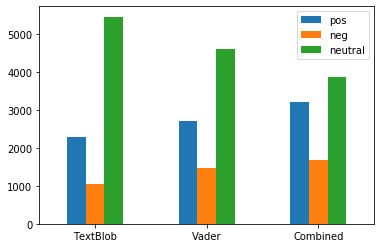

In [18]:
pos = [df.Textblob_sentiment.value_counts()['pos'], df.Vader_sentiment.value_counts()['pos'], df.Sentiment.value_counts()['pos']]
neg = [df.Textblob_sentiment.value_counts()['neg'], df.Vader_sentiment.value_counts()['neg'], df.Sentiment.value_counts()['neg']]
neutral = [df.Textblob_sentiment.value_counts()['neutral'], df.Vader_sentiment.value_counts()['neutral'], df.Sentiment.value_counts()['neutral']]
index = ['TextBlob','Vader','Combined']
ddf = pd.DataFrame({'pos': pos,
                   'neg': neg,
                   'neutral' : neutral}, index=index)
ax = ddf.plot.bar(rot=0)

# Save the result

In [19]:
df.to_csv(os.path.join(root,'clean_data_annotated.csv'),index=False)

In [20]:
df.Tag.value_counts()

general_election_sg                2250
singaporevotes                     1172
SingaporeVotes                     1098
general_election_sg2020             956
sgelections                         762
GE2020                              655
SGElection                          569
Ge2020                              308
GE2020SG                            211
Singapore General Election          179
wpsg                                129
GESG2020                            117
singapore_general_election_2020     101
Singapore GE 2020                    93
SGGE2020                             89
PAPSingapore                         81
Name: Tag, dtype: int64

(81, 15)


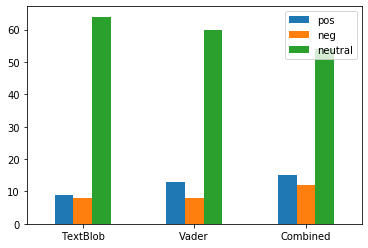

In [21]:
sel_df = df[(df['Tag']=='PAPSingapore')]
print(sel_df.shape)
pos = [sel_df.Textblob_sentiment.value_counts()['pos'], sel_df.Vader_sentiment.value_counts()['pos'], sel_df.Sentiment.value_counts()['pos']]
neg = [sel_df.Textblob_sentiment.value_counts()['neg'], sel_df.Vader_sentiment.value_counts()['neg'], sel_df.Sentiment.value_counts()['neg']]
neutral = [sel_df.Textblob_sentiment.value_counts()['neutral'], sel_df.Vader_sentiment.value_counts()['neutral'], sel_df.Sentiment.value_counts()['neutral']]

index = ['TextBlob','Vader','Combined']
dsel_df = pd.DataFrame({'pos': pos,
                       'neg': neg,
                       'neutral':neutral}, index=index)
ax = dsel_df.plot.bar(rot=0)

(129, 15)


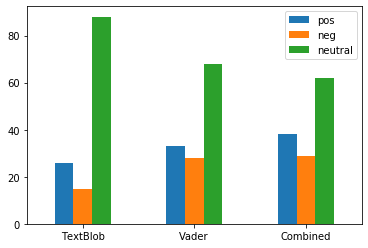

In [22]:
sel_df = df[(df['Tag']=='wpsg')]
print(sel_df.shape)
pos = [sel_df.Textblob_sentiment.value_counts()['pos'], sel_df.Vader_sentiment.value_counts()['pos'], sel_df.Sentiment.value_counts()['pos']]
neg = [sel_df.Textblob_sentiment.value_counts()['neg'], sel_df.Vader_sentiment.value_counts()['neg'], sel_df.Sentiment.value_counts()['neg']]
neutral = [sel_df.Textblob_sentiment.value_counts()['neutral'], sel_df.Vader_sentiment.value_counts()['neutral'], sel_df.Sentiment.value_counts()['neutral']]
index = ['TextBlob','Vader','Combined']

dsel_df = pd.DataFrame({'pos': pos,'neg': neg, 'neutral':neutral}, index=index)
ax = dsel_df.plot.bar(rot=0)

(8641, 15)


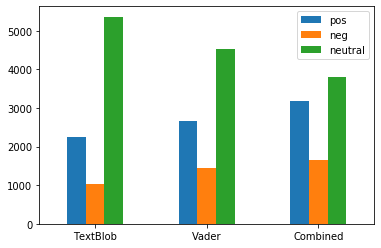

In [23]:
sel_df = df[(df['Tag']!='wpsg') & (df['Tag']!='papsingapore')]
print(sel_df.shape)
pos = [sel_df.Textblob_sentiment.value_counts()['pos'], sel_df.Vader_sentiment.value_counts()['pos'], sel_df.Sentiment.value_counts()['pos']]
neg = [sel_df.Textblob_sentiment.value_counts()['neg'], sel_df.Vader_sentiment.value_counts()['neg'], sel_df.Sentiment.value_counts()['neg']]
neutral = [sel_df.Textblob_sentiment.value_counts()['neutral'], sel_df.Vader_sentiment.value_counts()['neutral'], sel_df.Sentiment.value_counts()['neutral']]
index = ['TextBlob','Vader','Combined']
dsel_df = pd.DataFrame({'pos': pos,'neg': neg ,'neutral':neutral}, index=index)
ax = dsel_df.plot.bar(rot=0)